C:\Users\jackparsons210\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


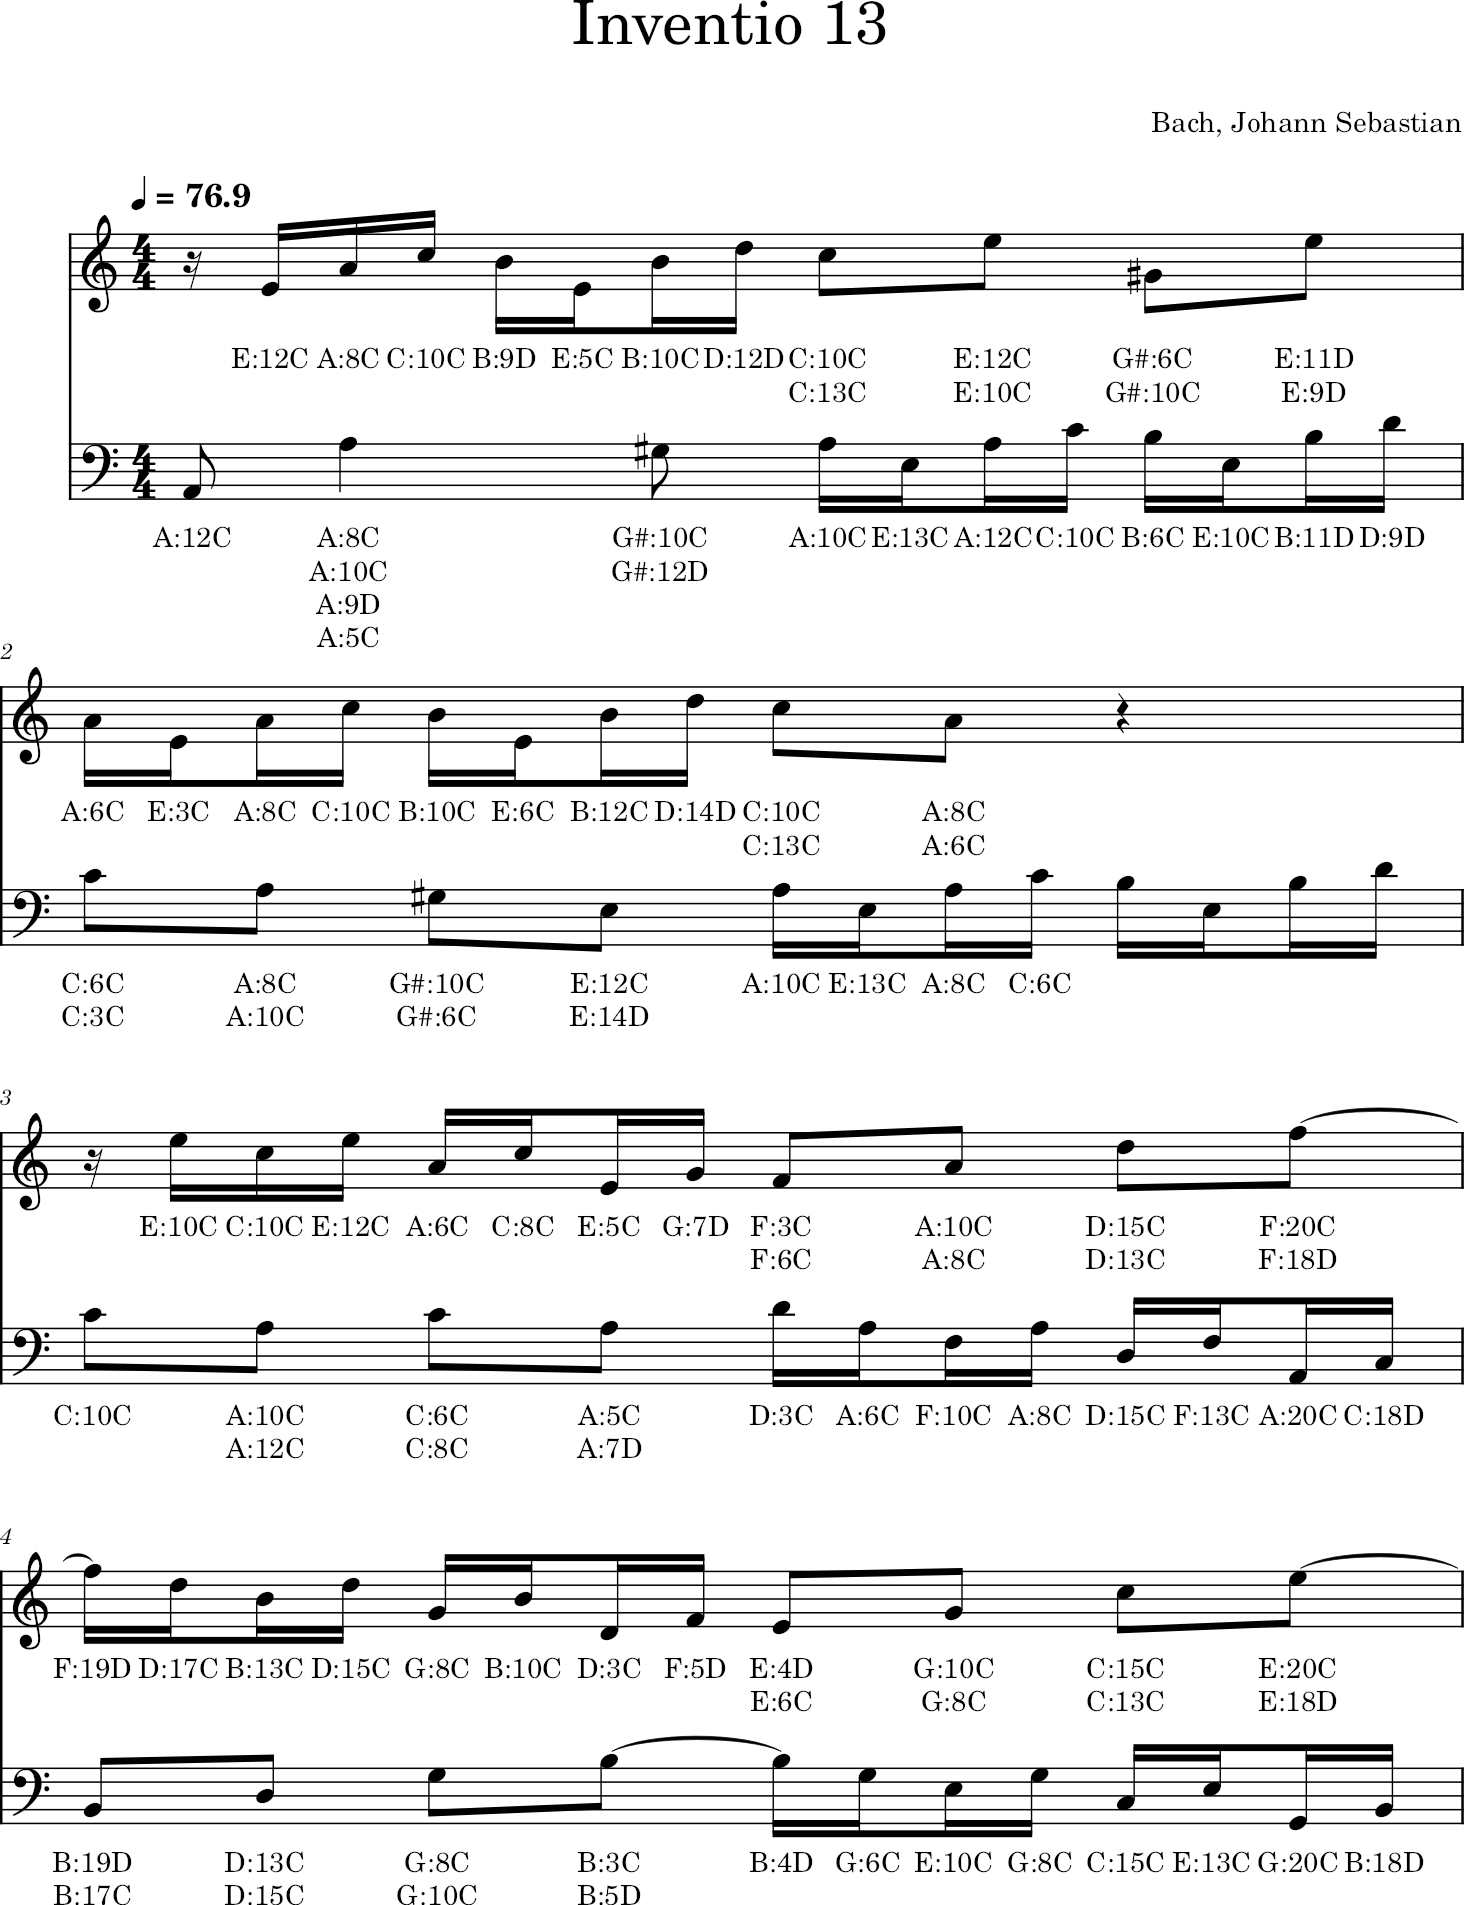

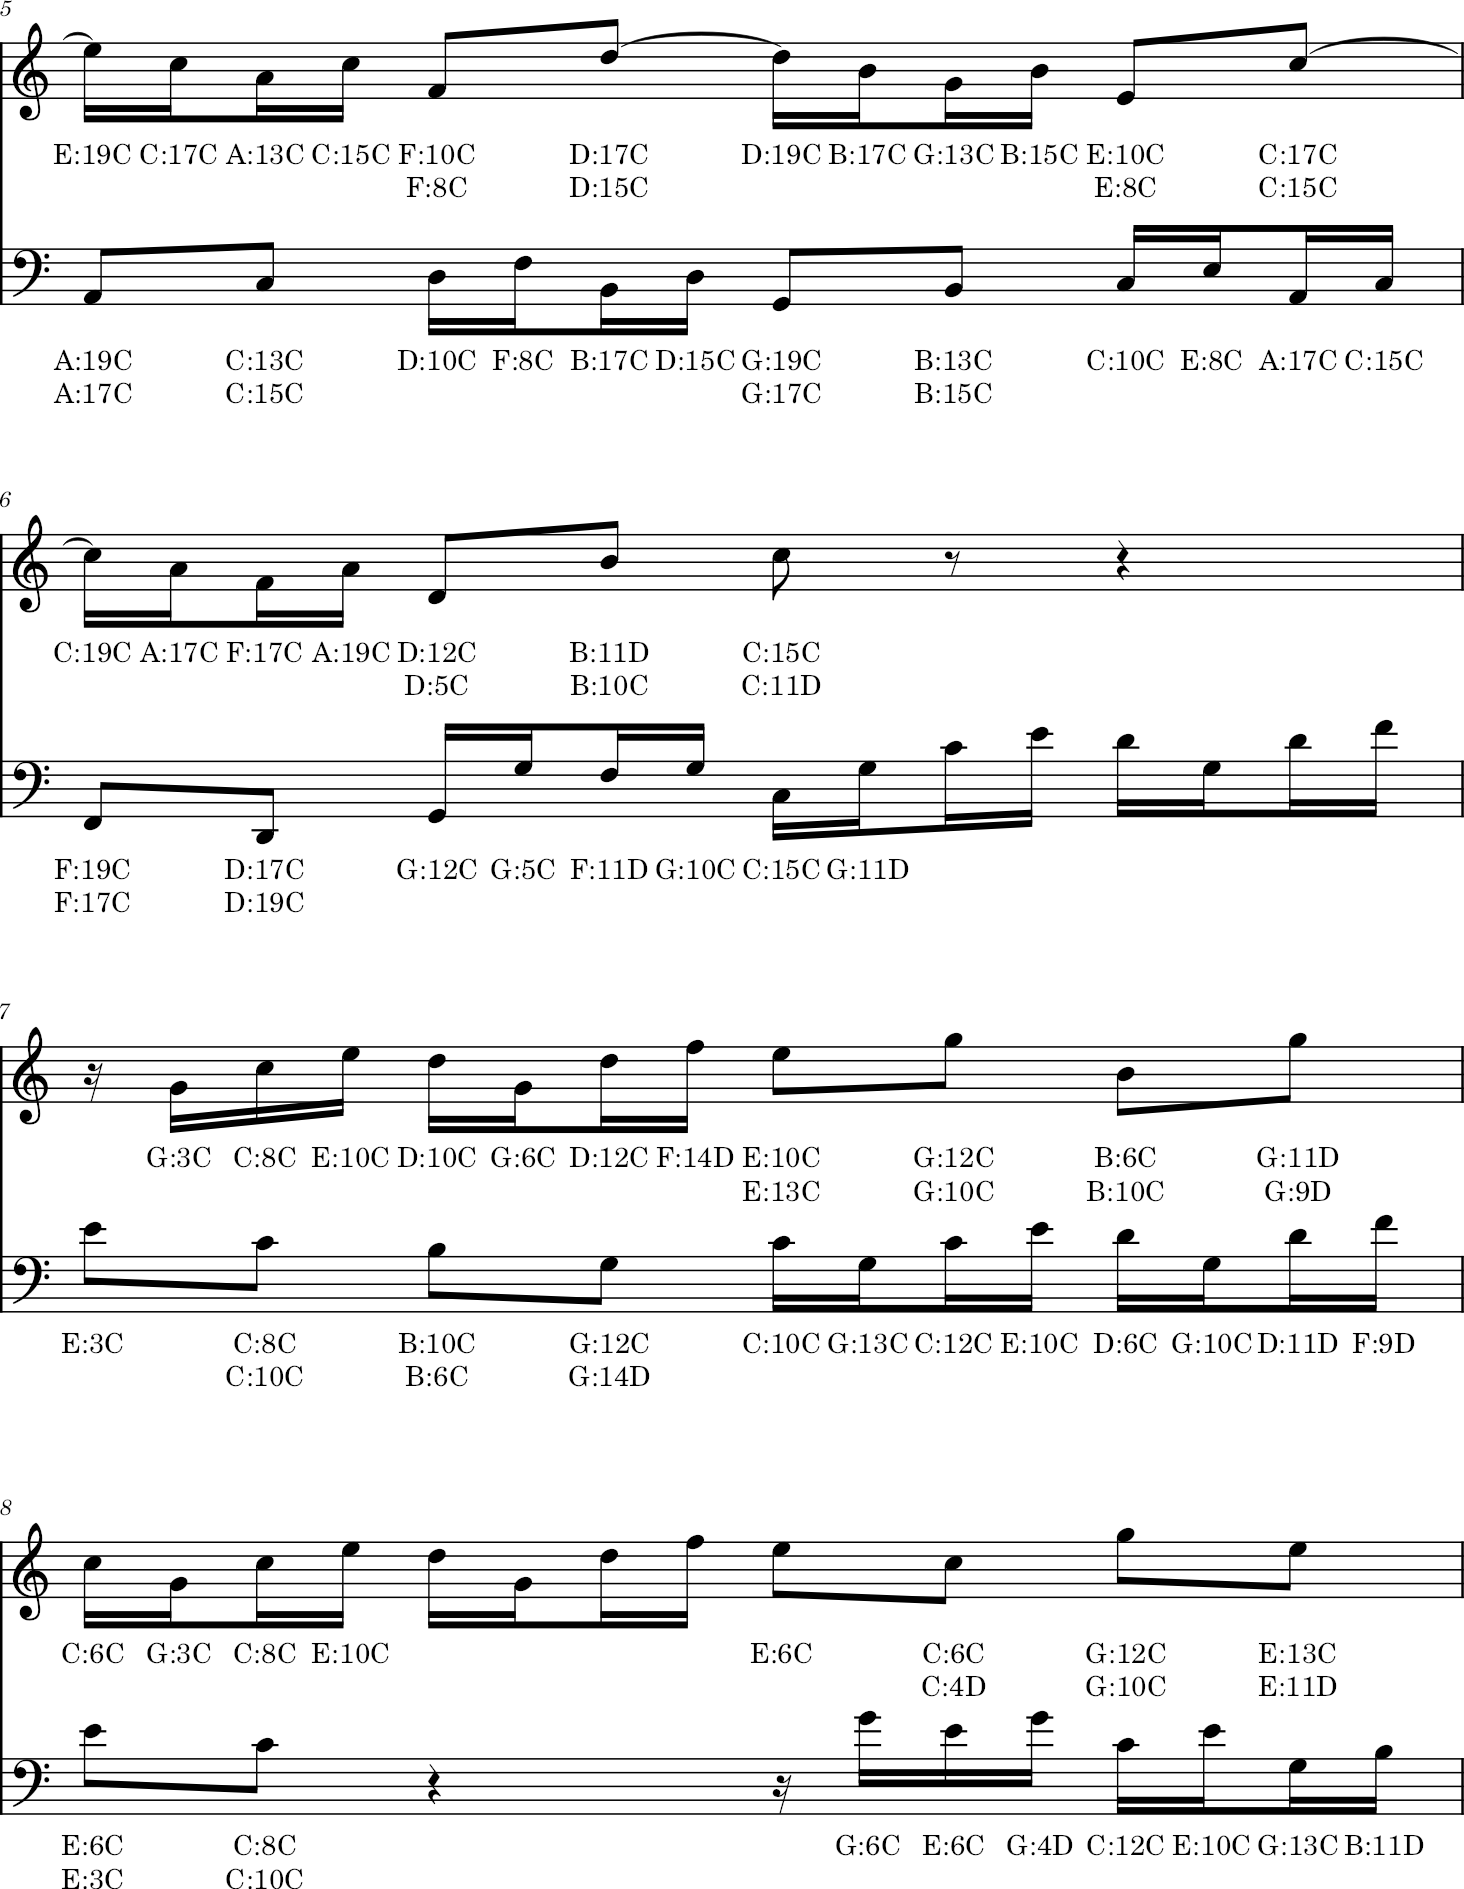

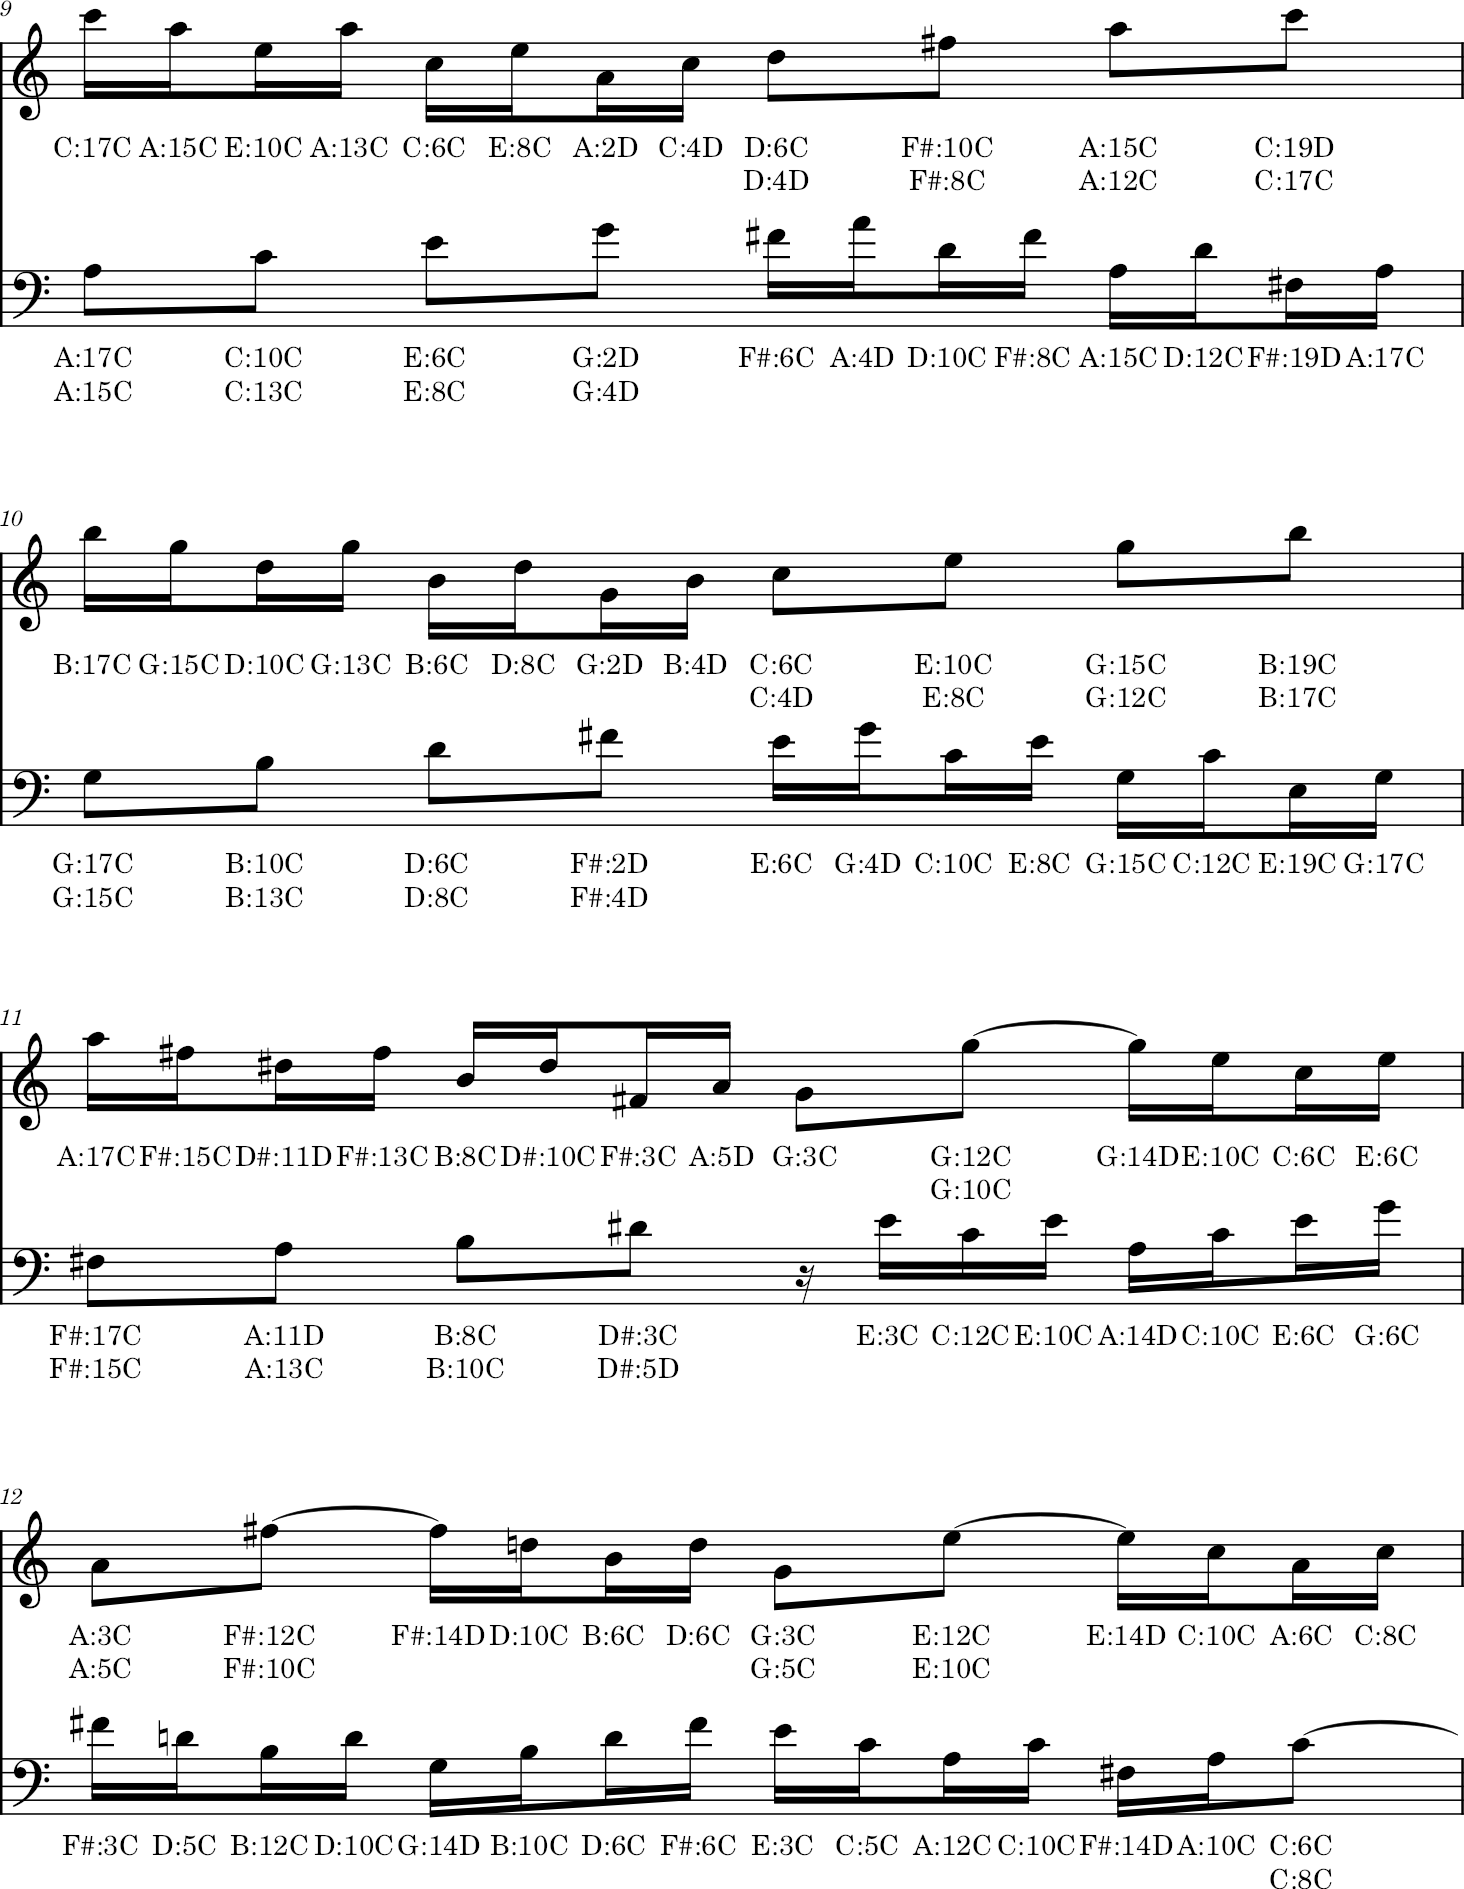

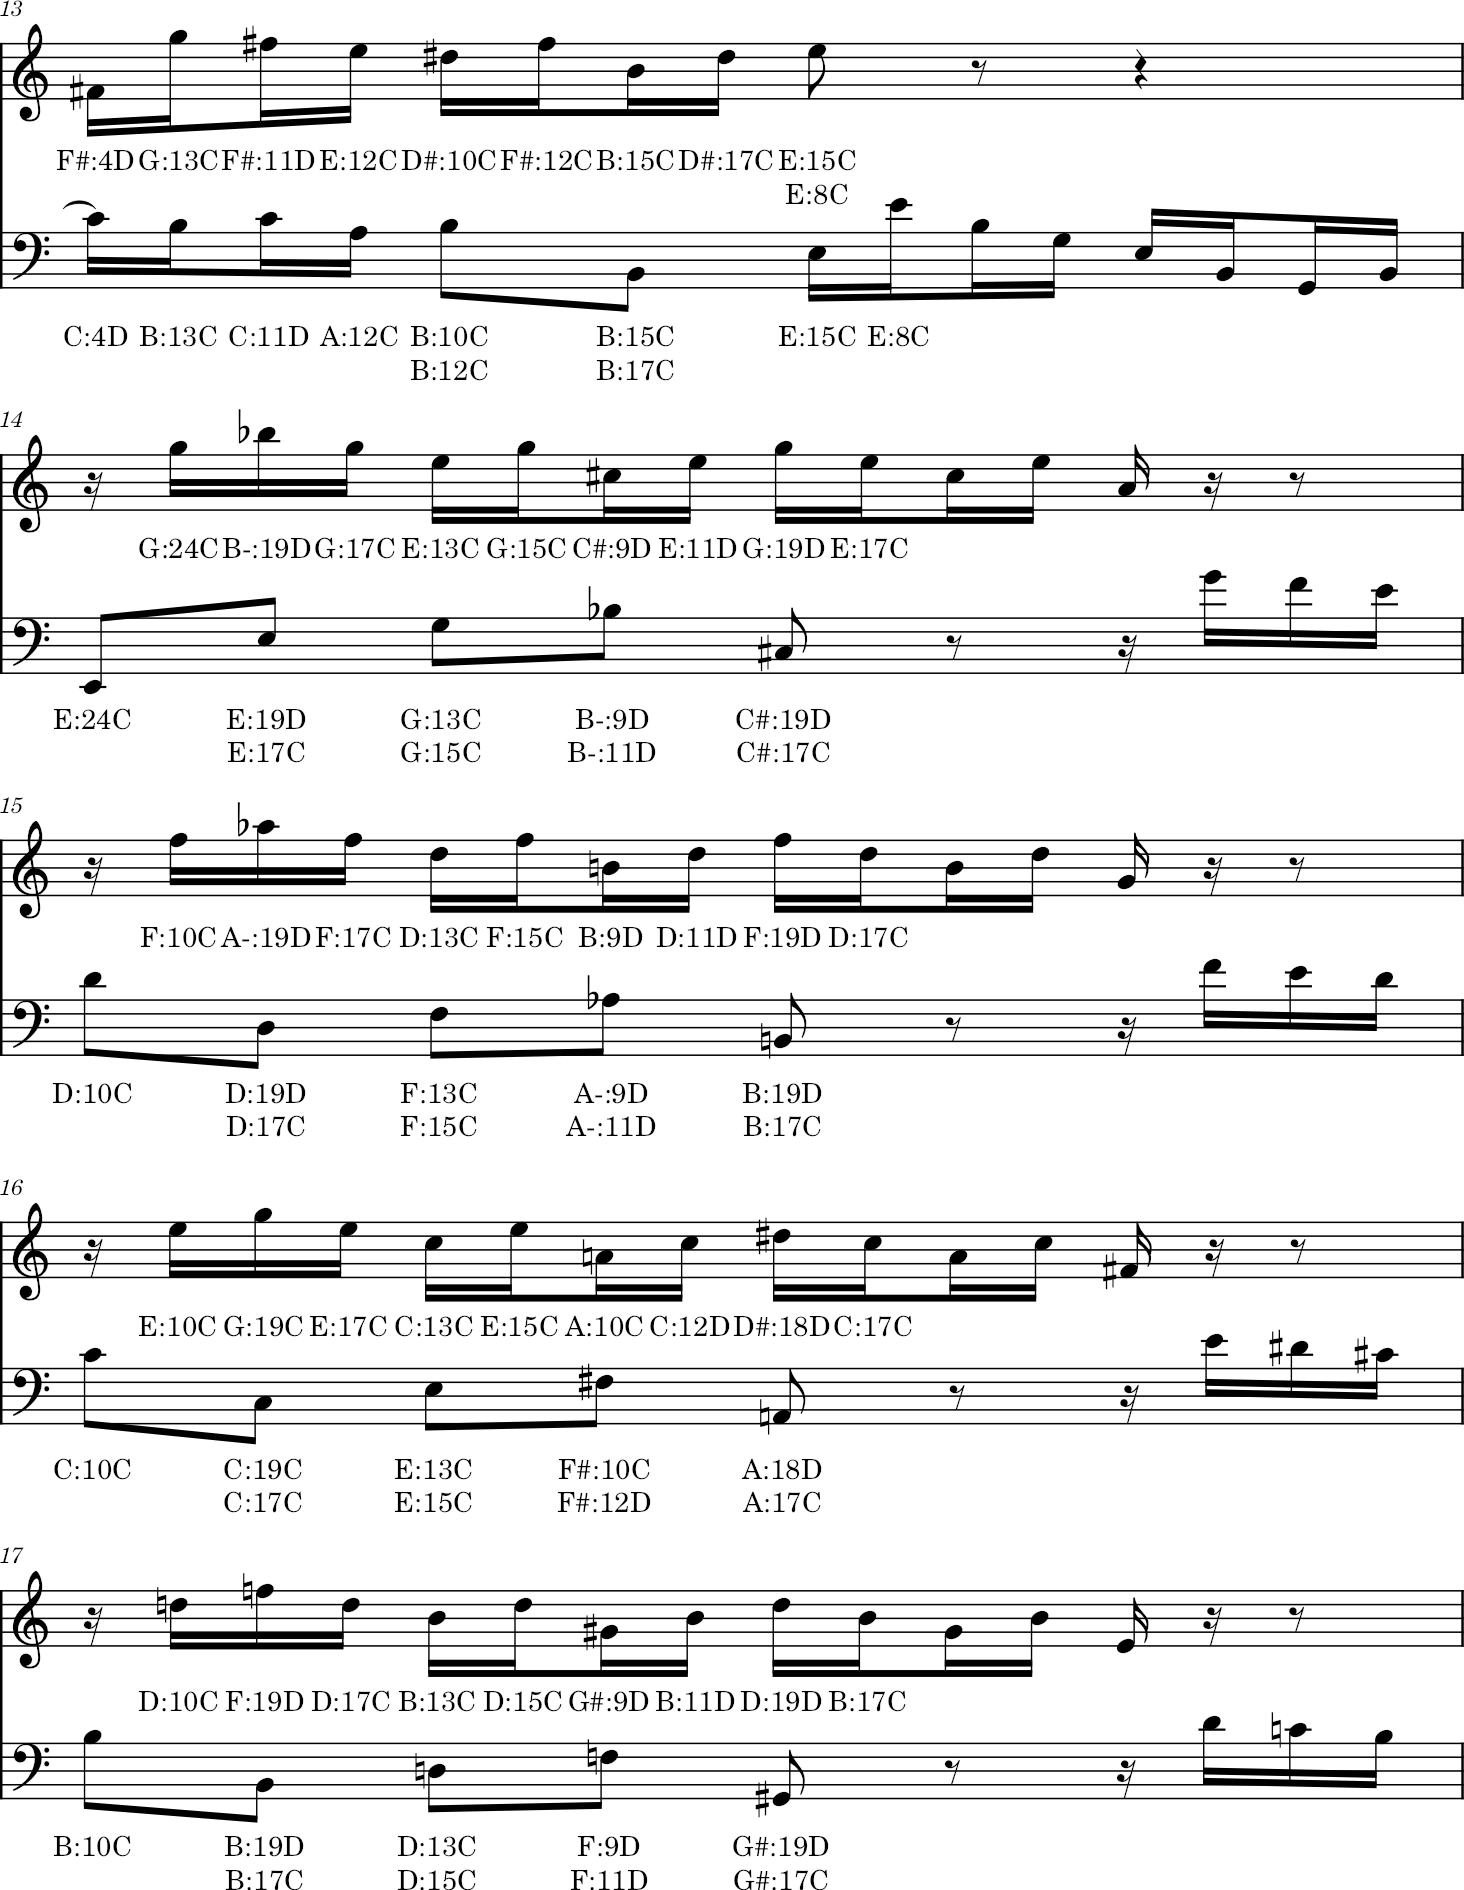

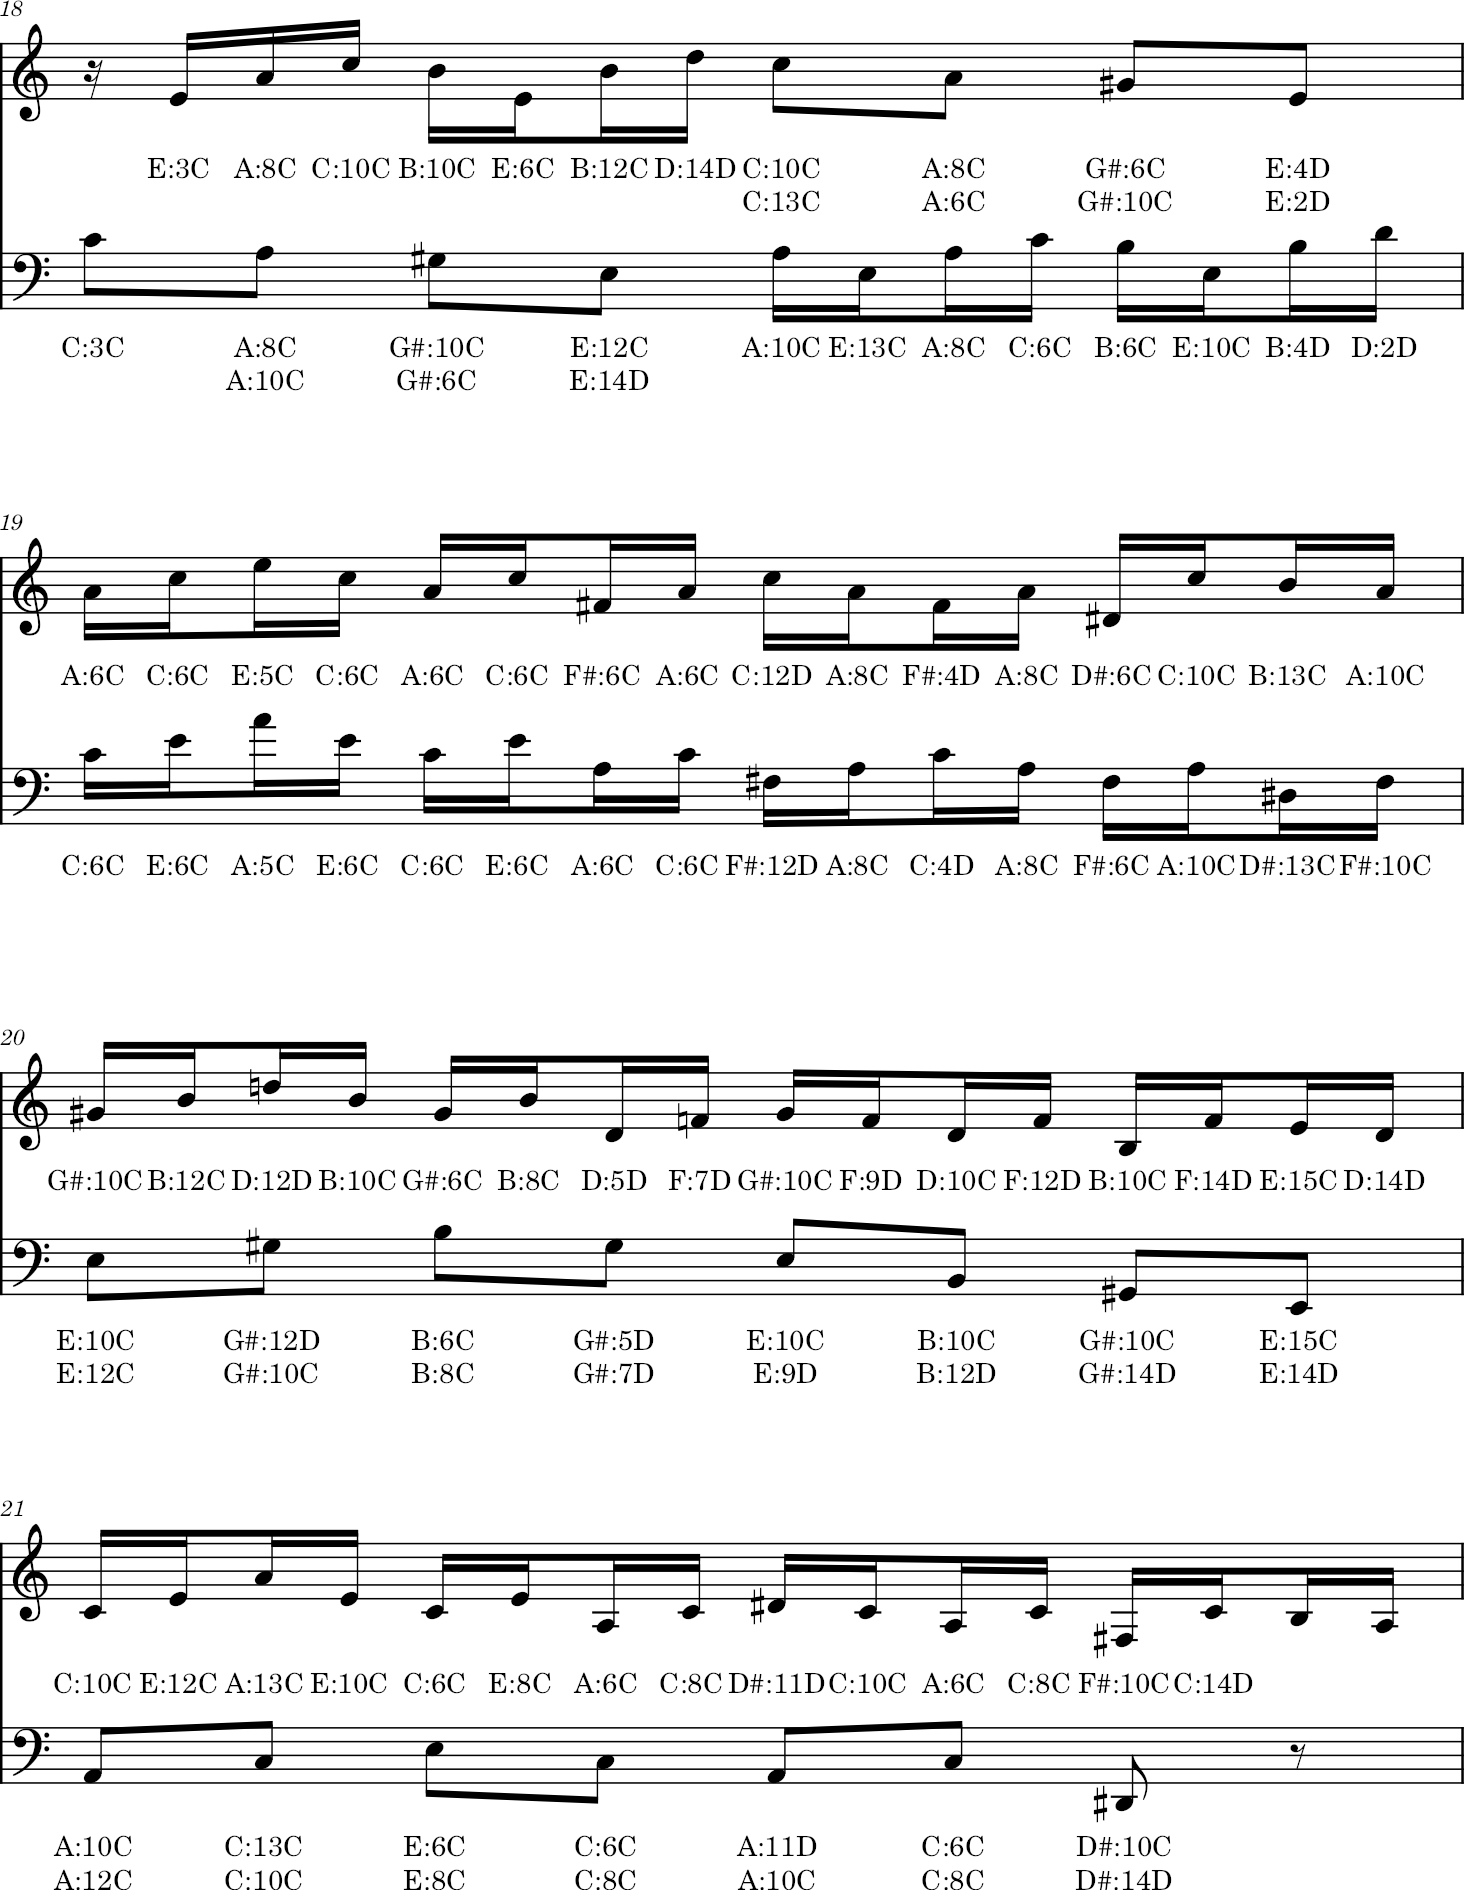

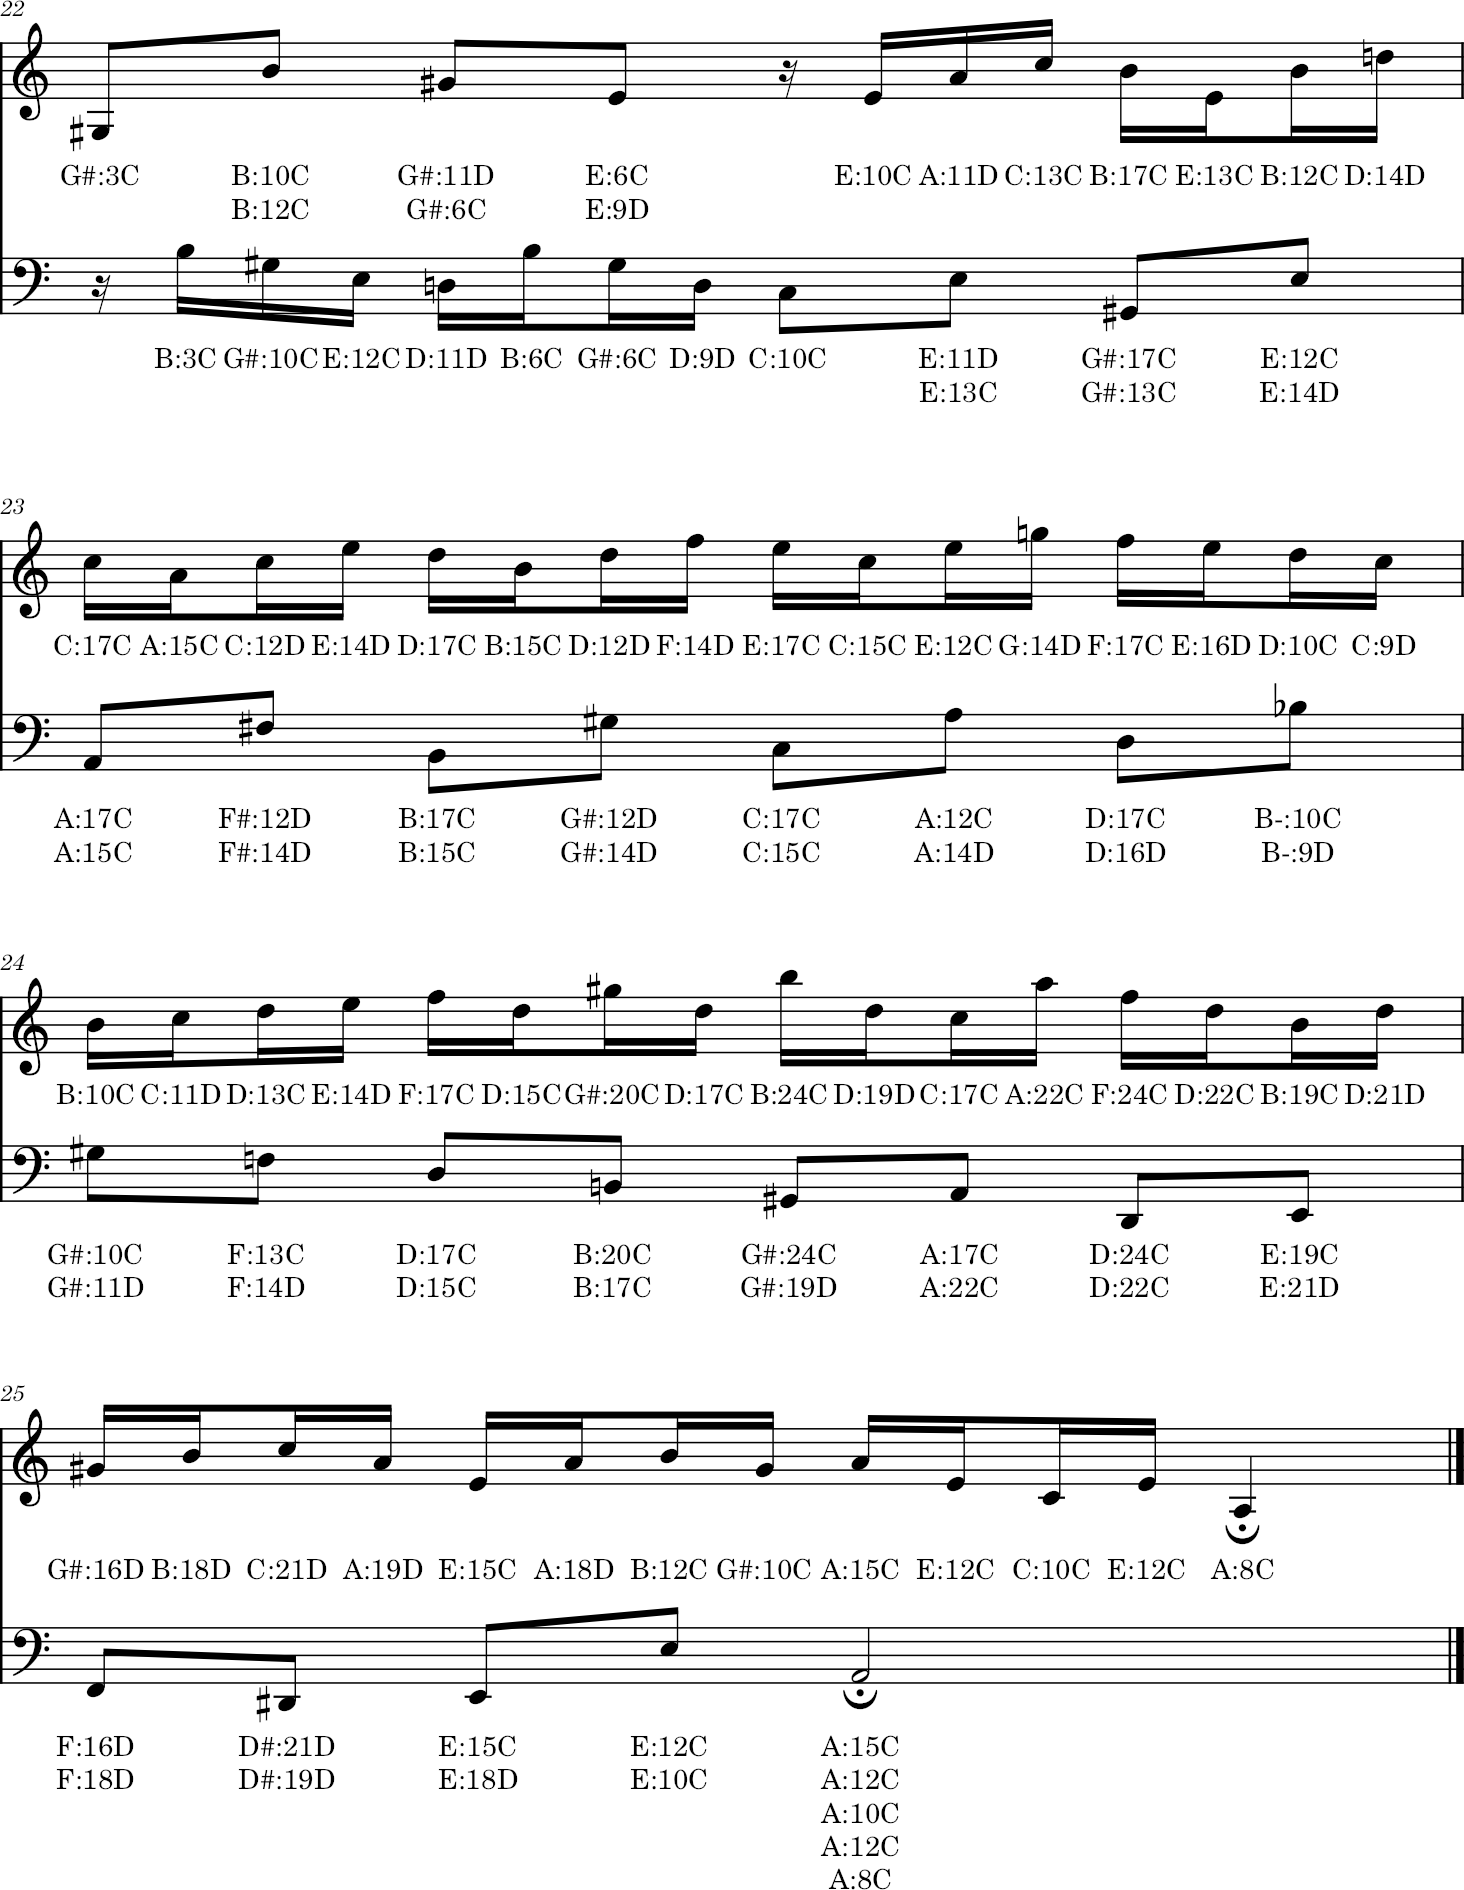

In [1]:
from music21 import note, chord, interval, stream, converter
score = converter.parse('inven13.krn')
parts = score.parts[:]
part_initials = ['S', 'B']


def clear_lyrics(score):
    """Clears all lyrics from the given score."""
    for part in score.parts:
        for measure in part.getElementsByClass('Measure'):
            for elem in measure.notesAndRests:
                if isinstance(elem, note.Note) or isinstance(elem, chord.Chord):
                    elem.lyrics = [] 
def annotate_intervals(parts):
    # Iterate over pairs of adjacent parts
    for i in range(len(parts) - 1):
        upper_part, lower_part = parts[i], parts[i + 1]
        upper_part_initial, lower_part_initial = part_initials[i], part_initials[i + 1]

        # Retrieve all notes for the upper and lower parts
        upper_notes = list(upper_part.flat.notes)
        lower_notes = list(lower_part.flat.notes)

        # Iterate through all notes in the upper part
        for upper_note in upper_notes:
            # Iterate through all notes in the lower part
            for lower_note in lower_notes:
                # Check if the notes overlap in time
                if (lower_note.offset >= upper_note.offset and
                    lower_note.offset < upper_note.offset + upper_note.duration.quarterLength) or \
                   (upper_note.offset >= lower_note.offset and
                    upper_note.offset < lower_note.offset + lower_note.duration.quarterLength):
                    lyric_upper_lower(upper_note, lower_note)

def digit(interval_str):
    # Use list comprehension to filter out non-digit characters
    digits = [char for char in interval_str if char.isdigit()]
    # Join the digits back into a string
    return ''.join(digits)

def lyric_upper_lower(upper_note, lower_note):
    interval_ = interval.notesToInterval(upper_note, lower_note)
    interval_str = digit(interval_.name)
    consonance = interval_.isConsonant()
    if consonance:
        tonality = "C"
    else:
        tonality = "D"
    # Correctly annotate the upper note with the interval and its note name
    upper_note.addLyric(f"{upper_note.pitch.name}:{interval_str}{tonality}")
    # Correctly annotate the lower note with the interval and its note name
    lower_note.addLyric(f"{lower_note.pitch.name}:{interval_str}{tonality}")
    

clear_lyrics(score)
# Apply interval annotations and note labels
annotate_intervals(parts)

# Show the score with interval annotations
score.show()